# SUICIDES RATES FROM 1985 to 2016
#### (keep coding and don't commit suicide)


In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

In [143]:
data=pd.read_csv("master.csv")
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Check **null values** in dataframe.

In [144]:
data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

Here, HDI for year have very much NaN values.

In [145]:
data.drop(["HDI for year","country-year"],axis=1,inplace=True)


In [146]:
data["age_start"]=data["age"].str.split("-")
data["age_end"]=data["age"].str.split("-")
data.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation,age_start,age_end
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,"[15, 24 years]","[15, 24 years]"
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,"[35, 54 years]","[35, 54 years]"
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,"[15, 24 years]","[15, 24 years]"


In [147]:
data["age_start"]=data["age_start"].apply(lambda x: x[0])
data["age_end"]=data["age_end"].apply(lambda x: x[-1])

In [148]:

data["age_start"]=data['age_start'].str.extract('(\d+)').astype(str)
data["age_end"]=data['age_end'].str.extract('(\d+)').astype(str)


In [149]:

data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', ' gdp_for_year ($) ', 'gdp_per_capita ($)',
       'generation', 'age_start', 'age_end'],
      dtype='object')

In [150]:
data["age_start"]=data["age_start"].astype("int64")
data["age_end"]=data["age_end"].astype("int64")


Make "gdp for year" as int.
<br>
Hence, 12,456(string) convert to 12456(int64).

In [151]:
data[" gdp_for_year ($) "]=data[" gdp_for_year ($) "].str.split(",")
data[" gdp_for_year ($) "]=data[" gdp_for_year ($) "].apply("".join)


In [152]:
data[" gdp_for_year ($) "]=data[" gdp_for_year ($) "].astype("int64")

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7    gdp_for_year ($)   27820 non-null  int64  
 8   gdp_per_capita ($)  27820 non-null  int64  
 9   generation          27820 non-null  object 
 10  age_start           27820 non-null  int64  
 11  age_end             27820 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 2.5+ MB


Create two lists containing categoricals and numericals.

In [154]:
categorical=["generation","country","age","sex"]
numerical=data.columns ^ categorical
print(categorical)
print(numerical)

['generation', 'country', 'age', 'sex']
Index([' gdp_for_year ($) ', 'age_end', 'age_start', 'gdp_per_capita ($)',
       'population', 'suicides/100k pop', 'suicides_no', 'year'],
      dtype='object')


In [155]:
data[numerical].describe()

,gdp_for_year ($),age_end,age_start,gdp_per_capita ($),population,suicides/100k pop,suicides_no,year
count,2.782000e+04,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000,27820.000000
mean,4.455810e+11,45.869950,35.034508,16866.464414,1.844794e+06,12.816097,242.574407,2001.258375
std,1.453610e+12,23.585993,23.797109,18887.576472,3.911779e+06,18.961511,902.047917,8.469055
min,4.691962e+07,14.000000,5.000000,251.000000,2.780000e+02,0.000000,0.000000,1985.000000
25%,8.985353e+09,24.000000,15.000000,3447.000000,9.749850e+04,0.920000,3.000000,1995.000000
50%,4.811469e+10,54.000000,35.000000,9372.000000,4.301500e+05,5.990000,25.000000,2002.000000
75%,2.602024e+11,74.000000,55.000000,24874.000000,1.486143e+06,16.620000,131.000000,2008.000000
max,1.812071e+13,75.000000,75.000000,126352.000000,4.380521e+07,224.970000,22338.000000,2016.000000


In [156]:
data[categorical].describe().head(4)

,generation,country,age,sex
count,27820,27820,27820,27820
unique,6,101,6,2
top,Generation X,Mauritius,15-24 years,female
freq,6408,382,4642,13910


In [157]:
explodeUniversal=([0.1]*10) #create an explode lists for pie chart

#Generation, Age and Sex

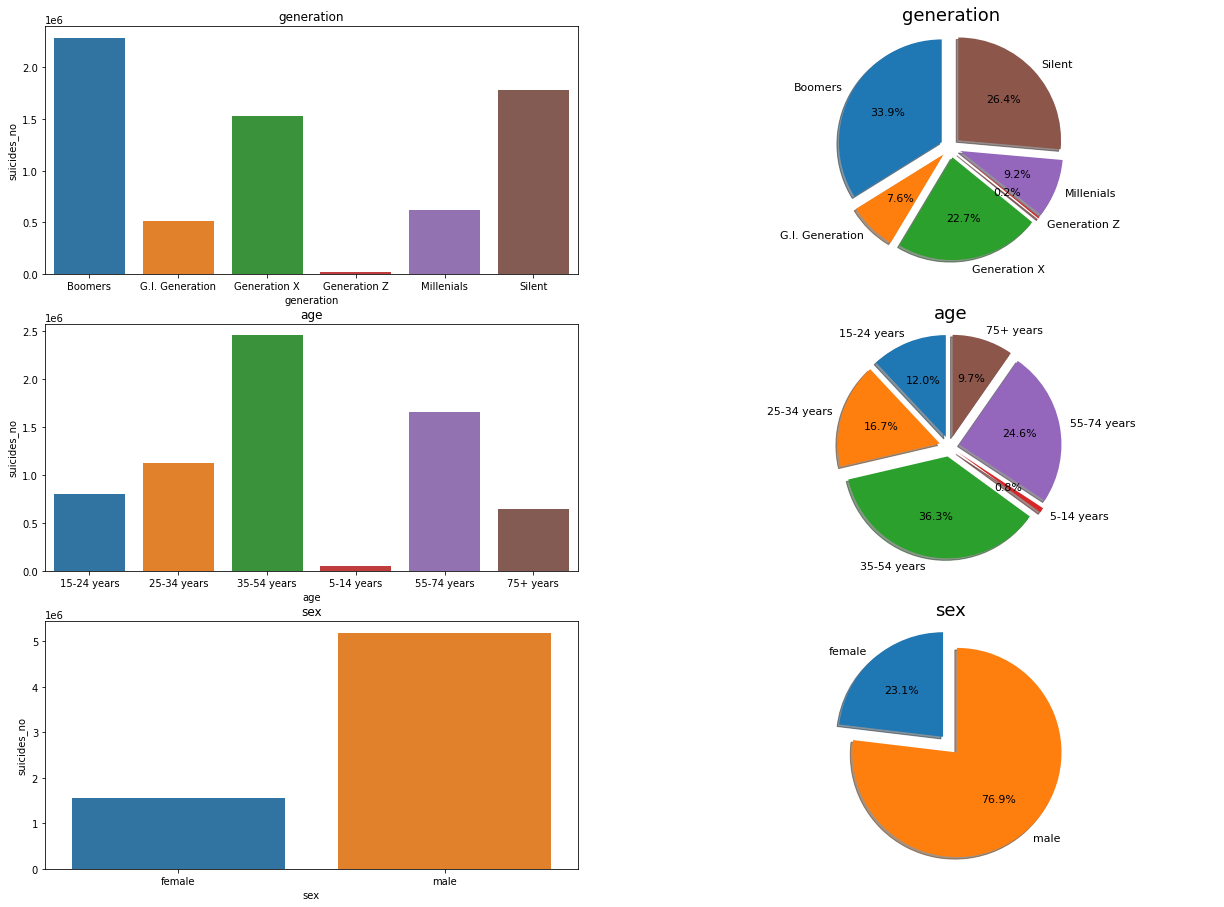

In [158]:
fig,ax=plt.subplots(3,2,figsize=(21,15.5))
categories=list(categorical)
categories.remove("country")
index=0
for i in range(3):
  df=data.groupby([categories[index]]).sum();
  sns.barplot(y=df["suicides_no"],x=df.index,ax=ax[i][0]);

  labels = df.index
  ax[i][0].set_title(categories[index])
  
  ax[i][1].set_title(categories[index],fontsize=18)
  sizes=[df.iloc[x]["suicides_no"]/df.suicides_no.sum() for x in range(len(labels))]
  explode = list(explodeUniversal[:len(labels)])
    

  ax[i][1].pie(sizes, explode=tuple(explode), labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 11})
  ax[i][1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

  index+=1
  


# Suicides every 4 Year 


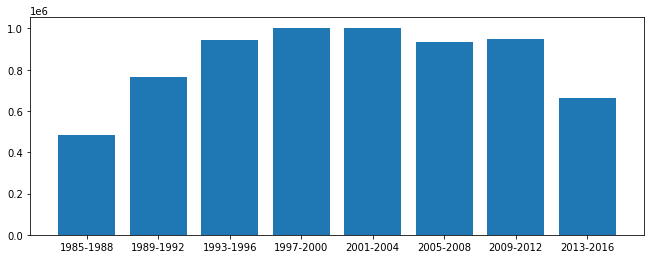

In [159]:
df=data.groupby(["year"]).sum()
fig,ax=plt.subplots(1,1,figsize=(11,4))
x=[]
y=[]
for i in range(1985,2017,4):
  s=0
  label=[]
  label.append(i)
  tmep=i
  for j in range(i,i+4):
  
    if (i>2016):
      break
    temp=j
    s+=df.loc[df.index==j]["suicides_no"][j]
  label.append(temp)
  y.append(s)
  x.append("-".join(str(k) for k in label))

plt.bar(x=x,height=y);

# **Country**

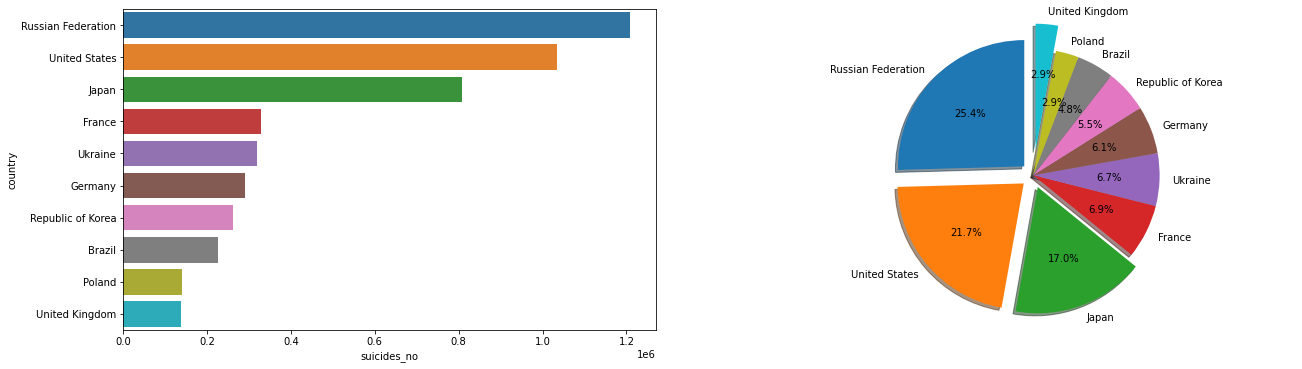

In [173]:
fig,ax=plt.subplots(1,2,figsize=(21,5.9))
df=data.groupby(["country"]).sum();
df=df.sort_values(by="suicides_no",ascending=False).head(10)
sns.barplot(y=df.index,x=df["suicides_no"],ax=ax[0])

countries=df.index

labels = countries
sizes=[df.iloc[i]["suicides_no"]/df.suicides_no.sum() for i in range(len(countries))]
explode = (0.1, 0.1, 0.1, 0,0,0,0,0,0,0.2) 

ax[1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].axis('equal') 

plt.show()


Russia seems to have many suicides from 1985-2016.


---

## Suicides by 100k population for each country


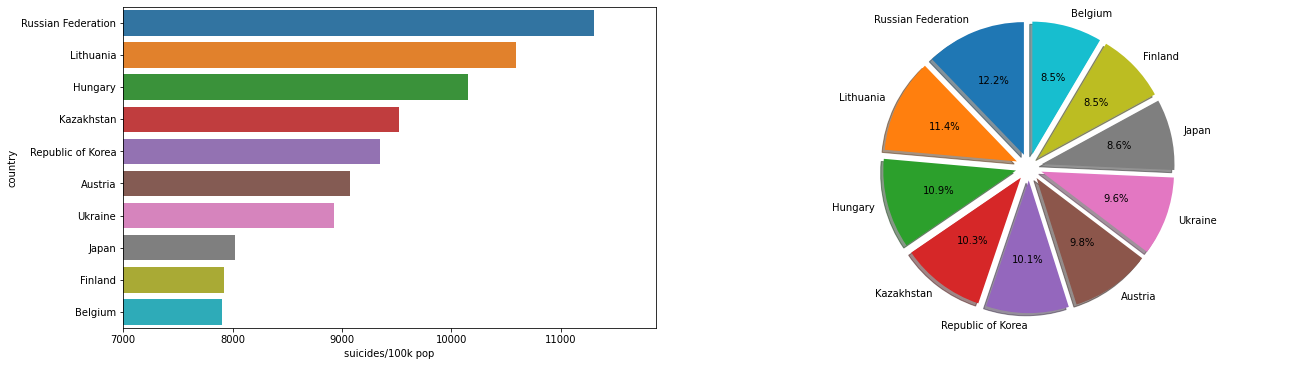

In [175]:
fig,ax=plt.subplots(1,2,figsize=(21,5.9))
df=data.groupby(["country"]).sum();
df=df.sort_values(by="suicides/100k pop",ascending=False).head(10)
sns.barplot(y=df.index,x=df["suicides/100k pop"],ax=ax[0])
# ax[0].set_xticklabels( df.index,rotation = 40, ha="right")


labels = df.index
sizes=[df.iloc[i]["suicides/100k pop"]/df["suicides/100k pop"].sum() for i in range(len(countries))]
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
ax[0].set_xlim([7000,None])
ax[1].pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Here it shows gdp per year for each country. 

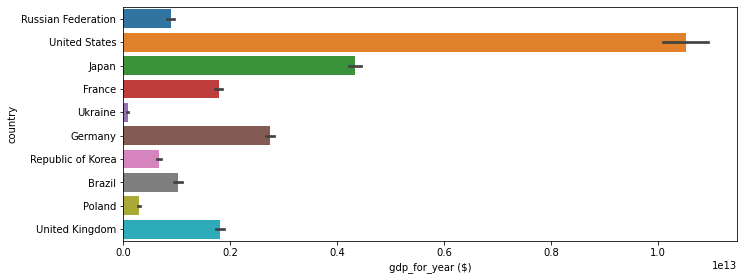

In [176]:
fig,ax=plt.subplots(1,1,figsize=(11,4.3))

# countries=countries
for i in range(len(countries)):
  d=data.loc[data['country']==countries[i]]
  df=pd.concat([df,d])
sns.barplot(data=df,x=" gdp_for_year ($) ",y="country",ax=ax);


## Suicides by each year (for 5 countries)

In [163]:
# countries=np.array(df.index)[:5]


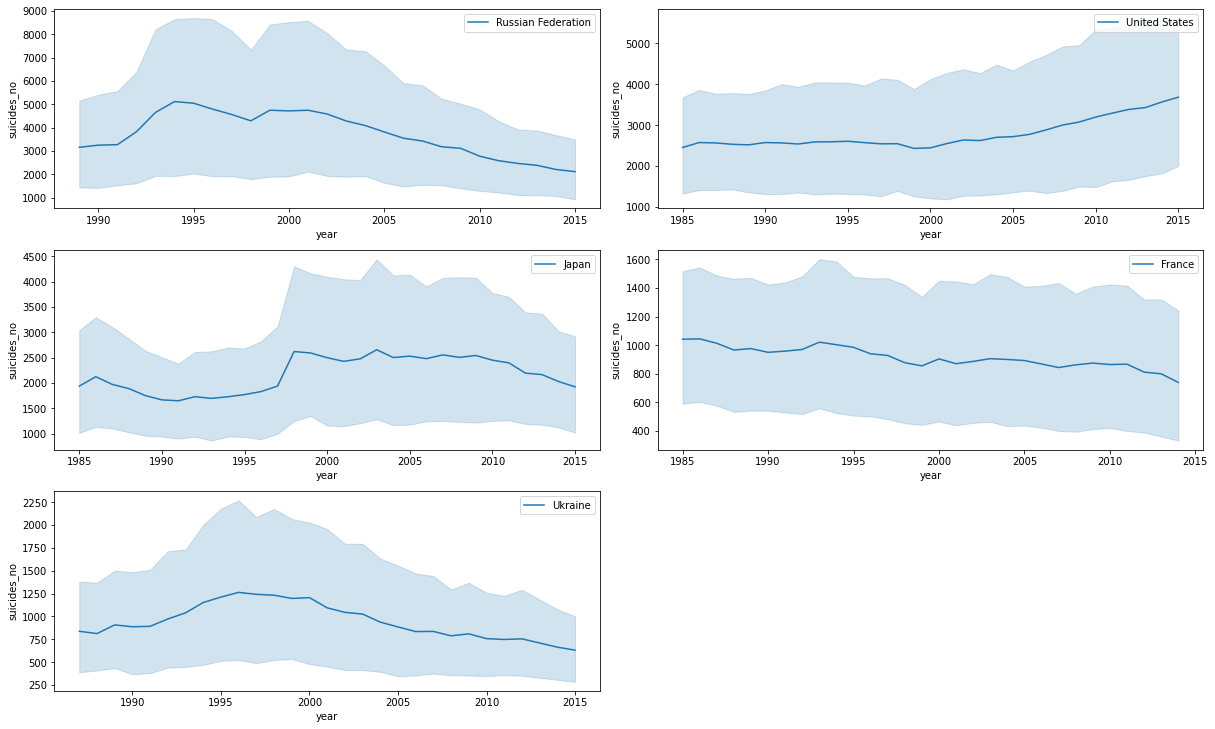

In [177]:
fig,ax=plt.subplots(3,2,figsize=(17,10.2))
index=0
for i in range(3):
  for j in range(2):
    if(i==2 and j==1):
      break
    sns.lineplot(x="year",data=data.loc[data["country"]==countries[index]],y="suicides_no",label=countries[index],ax=ax[i][j]);
    ax[i][j].set_ylabel("suicides_no");
    
    index+=1
ax[-1, -1].axis('off')

plt.tight_layout()


Here comes worldmap plot with animation.


In [178]:
!pip install pycountry

In [193]:
import pycountry

df1=data
list_countries = data['country'].unique().tolist()
d_country_code = {} 

for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        
        d_country_code.update({country: ' '})

for k, v in d_country_code.items():
    df1.loc[(df1.country == k), 'iso_alpha'] = v

fig = px.choropleth(data_frame = df1,
                    locations= "iso_alpha",
                    color= "suicides_no", 
                    hover_name= "country",
                    color_continuous_scale= 'RdYlGn',  
                    animation_frame= "year")

fig.show()

could not add ISO 3 code for -> Macau
could not add ISO 3 code for -> Saint Vincent and Grenadines


Our data does not have some countries information. 